## Matplotlib exercises

In [7]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os.path

# to make this notebook's output stable across runs
rnd.seed(4)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    image_dir = os.path.join(PROJECT_ROOT_DIR, "images")
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
    path = os.path.join(image_dir, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Loading the data 

This is Kaggle data on California housing which has been copied to my website to evade updates.

In [8]:
import pandas as pd
HOUSING_PATH = "http://gawron.sdsu.edu/housing.csv"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = housing_path#os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [9]:
df = load_housing_data()
#  We need no NaNs for what follows.  This is 
#  a big hammer, but put probably ok for what we're doing
df.fillna(0)
print(df.shape)
df

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## The data

Use `scale` from `sklearn.preprocessing`. This will 
center to the mean and scale column by column to unit variance.


**Arguments:**

*X   {array-like, sparse matrix} of shape (n_samples, n_features)*

    The data to center and scale.

*axis  int, default=0*

    axis used to compute the means and standard deviations along. If 0, independently standardize each feature, otherwise (if 1) standardize each sample.

*with_mean   bool, default=True*

    If True, center the data before scaling.

*with_stdbool, default=True*

    If True, scale the data to unit variance (or equivalently, unit standard deviation).

copybool, default=True

    set to False to perform inplace row normalization and avoid a copy (if the input is already a numpy array or a scipy.sparse CSC matrix and if axis is 1).


**Returns**

*X_tr{ndarray, sparse matrix} of shape (n_samples, n_features)*

    The transformed data.


In [81]:
import numpy as np
from sklearn.preprocessing import scale

X,Y = df.median_income.values, df.median_house_value.values
Z = np.vstack([X,Y]).T
print(X.shape,Y.shape,Z.shape,X[0],Y[0],Z[0])
#plt.scatter(X,Y)

(20640,) (20640,) (20640, 2) 8.3252 452600.0 [8.3252e+00 4.5260e+05]


A string formatting trick (consecutive strings)

What would happend if we centered and scaled data.  

May not be useful for every problem.

In [82]:
Z_scale = scale(Z,axis=0)
#print(Z_scale.shape)
print(f" Data Mn:   {Z[:,0].mean():0.3f} {Z[:1].mean():0.3f}"
      f"    Data STD: {Z[:,0].std():0.3f} {Z[:1].std():0.3f}\n"
      f" Scaled Mn: {Z_scale[:,0].mean():0.3f} {Z_scale[:,1].mean():0.3f}"
      f"        Scaled STD: {Z_scale[:,0].std():0.3f} {Z_scale[:1].std():0.3f}\n")

 Data Mn:   3.871 226304.163    Data STD: 1.900 226295.837
 Scaled Mn: 0.000 -0.000        Scaled STD: 1.000 0.108



#### Example:  Plot total_bedrooms versus households.

In [5]:
by_households = df.sort_values(by=['households'])[['total_bedrooms','households']]

<AxesSubplot:xlabel='households'>

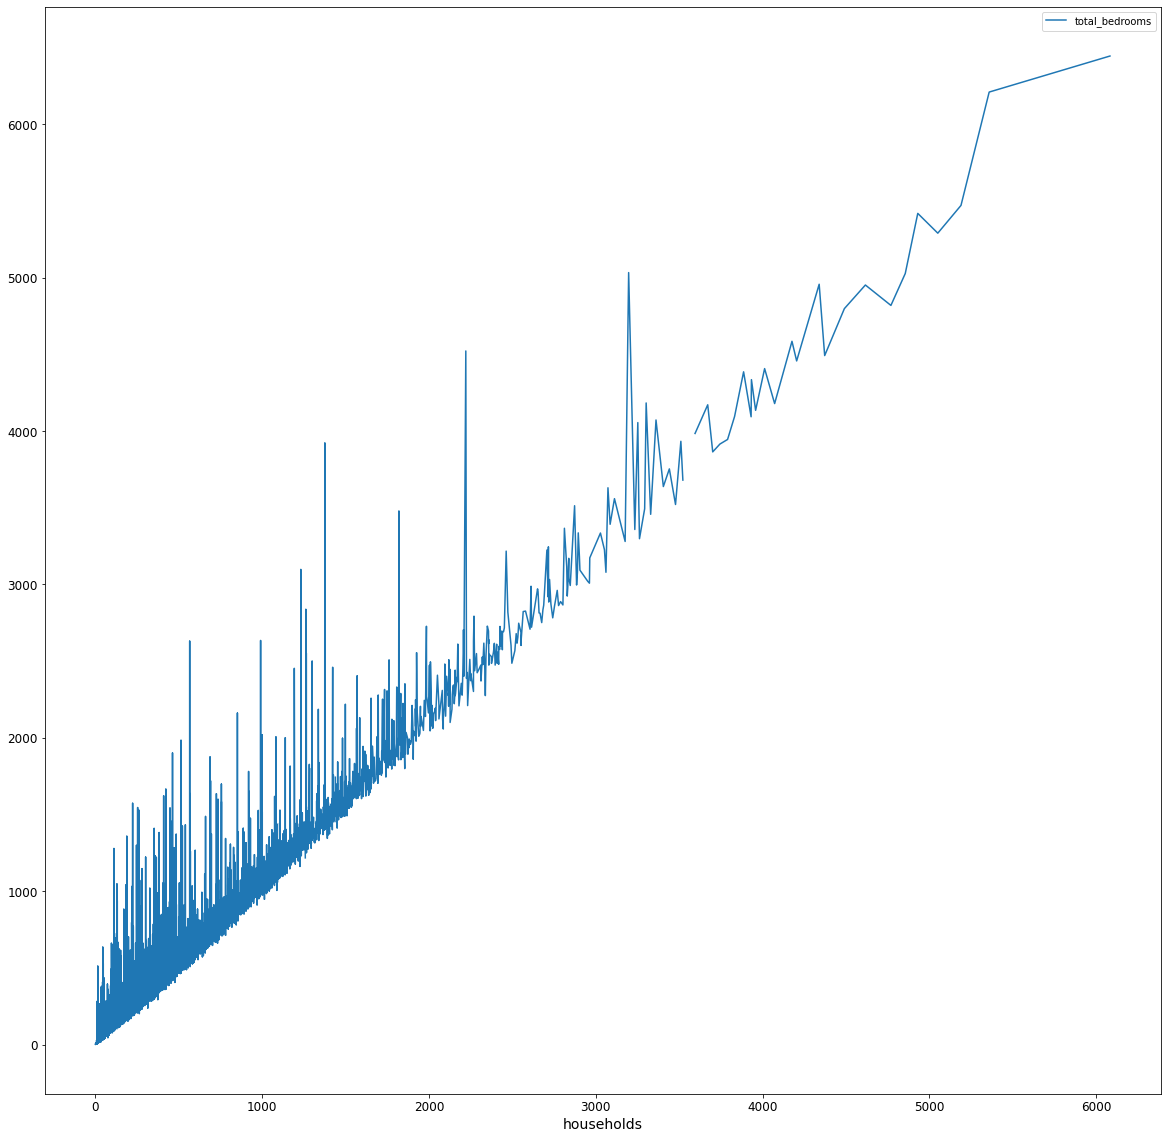

In [6]:
by_households.plot(x='households',y='total_bedrooms',figsize=(20,20))

Not a function.  In other words, in different communities the same humber of households might correspond to very different numbers of total bedrooms.

Let's do some binning: we'll round off to the nearest 50 and take the mean number
of bedrooms for each bin.

In [85]:
import pandas as pd

# Bins: households rounded off to the nearest 50
by_households['Households Level'] = \
         by_households['households'].apply(lambda x: 50 * (x // 50))
bh_pivot = pd.pivot_table(by_households, 
                    values='total_bedrooms',
                    index= 'Households Level',
                    aggfunc=np.mean)
bh_pivot

,total_bedrooms
Households Level,
0.0,46.720365
50.0,97.358314
100.0,161.683043
150.0,199.337266
200.0,245.075658
...,...
4900.0,5419.000000
5050.0,5290.000000
5150.0,5471.000000


We get a plot that tells the story:  Exception  for a few bins in the middle range
of households, the average number of bedrooms in this data set is very close to 1.

Text(0, 0.5, 'Bedrooms')

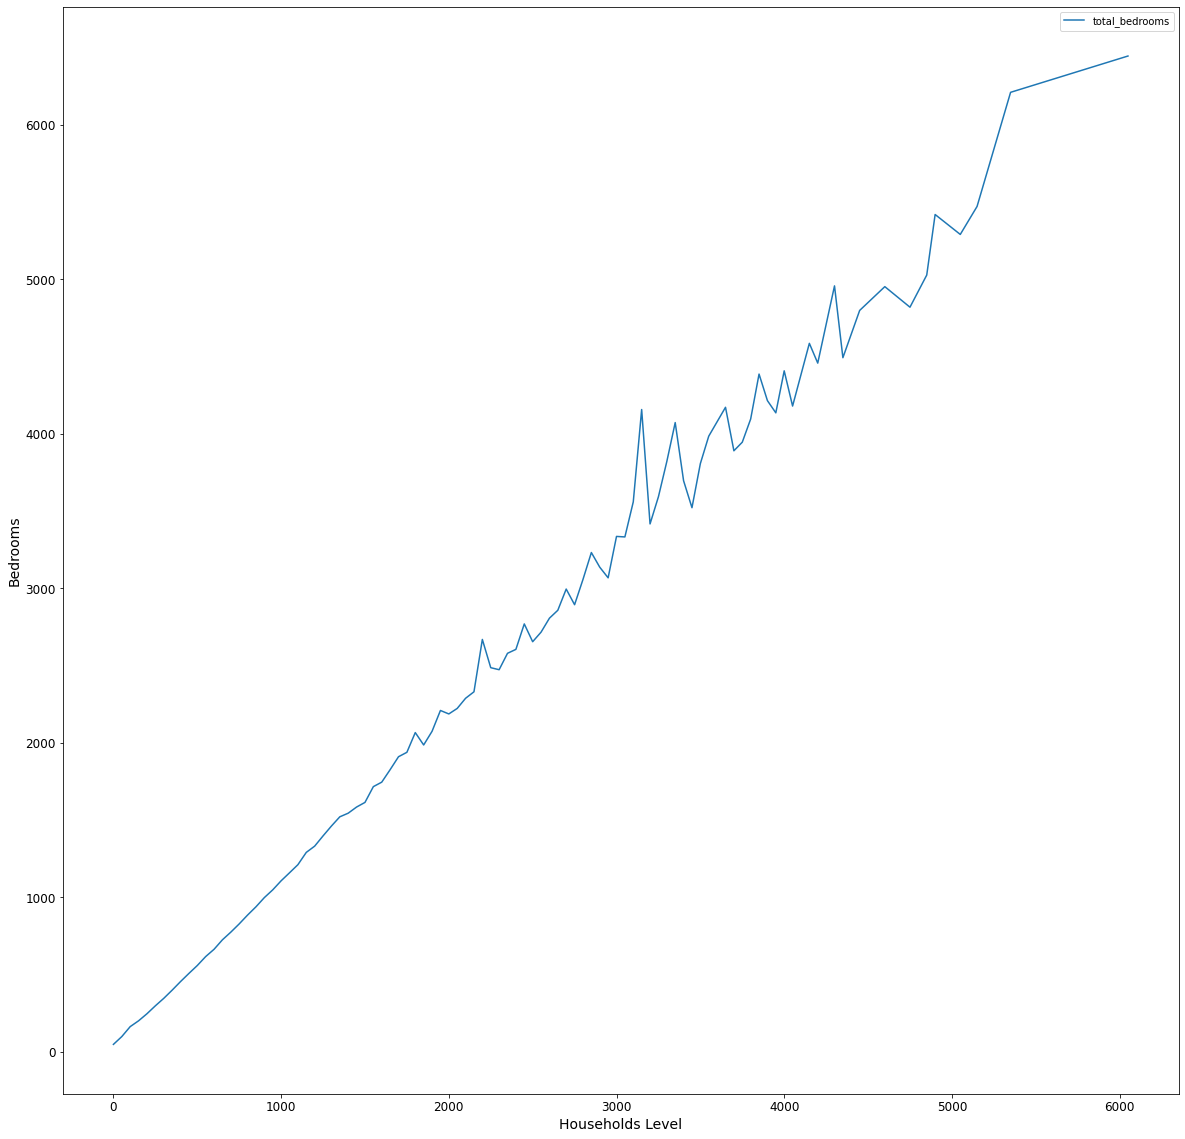

In [86]:
#plt.plot(Z_scale[:,0],Z_scale[:,1])
#bh_pivot.plot(x='households_level',y='index')
fig, ax = plt.subplots(1,1)
bh_pivot.plot(figsize=(20,20),ax=ax)
plt.ylabel('Bedrooms')

## Problem A

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Plot median house value (y-axis) versus average number of bedrooms (x-axis).
By eyeballing your plot, decide whether average niumber of BRs is a good predictor of
median house value.

Do this two ways.  First use pandas plot method on a data frame
whose index contains the values you want on the x-axis. Second
using that data frame to supply the values,  plot it
using the pyplot plot function (plt.plot).  Customize your results
with line style and line color.  Add a text annotation at one of
the spikes.

You should start by adding a column for average number of BRs to the original DF.
You may want to try some form of binning of the average number of BRs as was done above.
Note that, with a variable that ranges over small values, rounding off to
the nearest integer may obscure a lot.

Use `round(x,1)` to round off to 1 decimal place.

In [ ]:
df2 = df.sort_values(by=['avg_BRs'])
##  create pivot table
pivot_df = pd.pivot_table(df2, ....)
## Plot!
pivot_df.plot(...)

In [2]:
# Step 3 plot..
#... pivot_df..


A note on the data before we begin.  This data is either very old or it's been capped or
both.

In [40]:
df['median_house_value']b.max()

500001.0

In [72]:
df['avg_BRs'] = round_off_to_nearest (df['households']/df['total_bedrooms'])
#df2 = df.fillna(0)
df2 = df.sort_values(by=['avg_BRs'])

In [73]:
#df2[df2['avg_BRs'] == 1.0]
df3 = df2[['avg_BRs','median_house_value']]
#pd.pivot_table(df3, ...)
hvbr_pivot = pd.pivot_table(df3, 
                    values='median_house_value',
                    index= 'avg_BRs',
                    aggfunc=np.mean)
hvbr_pivot

,median_house_value
avg_BRs,
0.0,209466.777778
0.1,135488.888889
0.2,164827.638298
0.3,137469.090909
0.4,151126.606383
0.5,165416.427273
0.6,166138.027132
0.7,181470.711957
0.8,188368.279338


Text(0, 0.5, 'Median House Value')

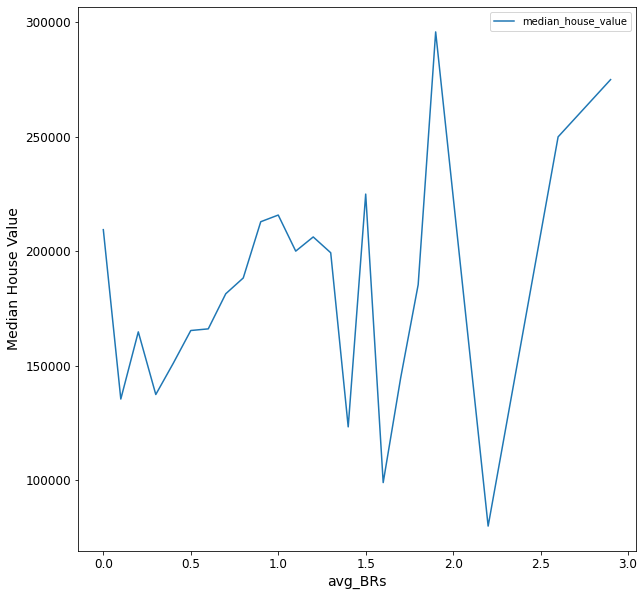

In [75]:
#df3['avg_BRs'].max(),df3['avg_BRs'].min()

hvbr_pivot.plot(figsize=(10,10))
# Note we can play with figure properties
plt.ylabel('Median House Value')

## Problem B

Do a linear regression trying to predict median_house_value from median_income.

Separate data into trainimng and test (90/10)

Do a single plot that shows a scatterplot of all the points and 
the line discovered by regression.  This will require finding
the model parameters on the trained LinearRegression instance.
See the Linear Regression notebook.

Here are some imports that may prove useful.  The mean_squared_error is
for those who wish to think about evaluating the model by computing
the residual for the test data.

In [5]:
print(train_test_split.__doc__)

Split arrays or matrices into random train and test subsets

    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also None, it will
        be set to 0.25.

    train_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and re

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
lin1 = LinearRegression()
Xsample = np.c_[df["median_income"]]
ysample = np.c_[df["median_house_value"]]
# prepare training test data
X_train, X_test, y_train, y_test = \
          train_test_split(Xsample,ysample)
# Train classifier
lin1.fit(X_train,y_train)
### test the model on the test data
y_predicted = lin1.predict(X_test)

(-9.999999999998899e-05, 15.5001, 9999.0, 505001.0)

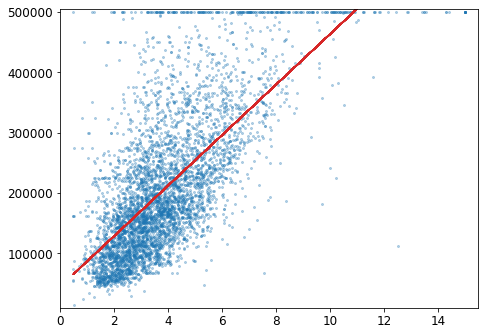

In [22]:
import matplotlib.colors as mcolors
tblue = mcolors.TABLEAU_COLORS['tab:blue']
tred = mcolors.TABLEAU_COLORS['tab:red']
# Xlimits
xmax,xmin = df["median_income"].max(),df["median_income"].min()
# Ylimits
ymax,ymin = df["median_house_value"].max(),df["median_house_value"].min()

fig, ax = plt.subplots(1,1,figsize=(7.5,5.5))
###  Plot the TEST points
ax.scatter(X_test,y_test,c=tblue,s=4,alpha=.3)
##  Plot the line discovered by the model
ax.plot(X_test,y_predicted,c=tred)
xdelta,ydelta = .5,5_000
plt.axis([xmin-xdelta, xmax+xdelta, ymin-ydelta, ymax+ydelta])

Evaluate the model by mse

In [37]:
np.sqrt(mean_squared_error(??,??))

86349.76491105583

Evaluate the model by r2 (explained variance):

In [38]:
from sklearn.metrics import r2_score

r2_score(??, ??)

0.4567009873156618